In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
  !sudo apt-get install -y fonts-nanum
  !sudo fc-cache -fv
  !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,605 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 156210 files and d

In [93]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import collections

In [85]:
font_name = 'NanumBarunGothic'
plt.rc('font', family=font_name, size=20)
plt.rcParams["figure.figsize"] = (20, 10)

In [94]:
DATA_DIR = './drive/MyDrive/(22-1)캡스톤/recomm/data/raw_data'

# problemMeta.csv
- ```problemId```: 문제 id
- ```title```: 문제 제목
- ```tags```: 태그의 key
- ```acceptedUserCount```: 맞은 사람 수
- ```averageTries```: 평균 시도 횟수
- ```level```: solved.ac에서 평가한 난이도

In [95]:
problemMeta = pd.read_csv(os.path.join(DATA_DIR, "problemMeta.csv"))
problemMeta = problemMeta[['problemId', 'title', 'tags', 'acceptedUserCount', 'averageTries', 'level']]
problemMeta

,problemId,title,tags,acceptedUserCount,averageTries,level
0,1000,A+B,"['arithmetic', 'math', 'implementation']",168115,2.3543,1
1,1001,A-B,"['arithmetic', 'math', 'implementation']",140639,1.3922,1
2,1002,터렛,"['geometry', 'math']",24743,4.6195,7
3,1003,피보나치 함수,['dp'],33462,3.2071,8
4,1004,어린 왕자,['geometry'],8248,2.3484,8
...,...,...,...,...,...,...
22763,24826,Reconstructing Tape Art,[],0,0.0000,0
22764,24827,Jack The Lumberjack,[],0,0.0000,0
22765,24828,Random Digital Exponentiation,"['bruteforcing', 'number_theory', 'backtrackin...",3,2.3333,11
22766,24829,Counting Codes,[],0,0.0000,0


In [ ]:
problemMeta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22768 entries, 0 to 22767
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   problemId          22768 non-null  int64  
 1   title              22767 non-null  object 
 2   tags               22768 non-null  object 
 3   acceptedUserCount  22768 non-null  int64  
 4   averageTries       22768 non-null  float64
 5   level              22768 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.0+ MB


- 총 **22,768** 개의 문제

# problemTagMeta.csv
- ```key```: 태그 ID
- ```bojTagID```: 백준에서 사용되는 태그 ID
- ```problemCount```: 해당 태그를 사용하는 문제 수
- ```name_kor```: 한국 이름
- ```name_eng```: 영어 이름

In [ ]:
problemTagMeta = pd.read_csv(os.path.join(DATA_DIR, "problemTagMeta.csv"))
problemTagMeta = problemTagMeta[['key', 'problemCount', 'name_kor', 'name_eng']]
problemTagMeta

,key,problemCount,name_kor,name_eng
0,0_1_bfs,24,0-1 너비 우선 탐색,0-1 bfs
1,2_sat,42,2-sat,2-sat
2,a_star,1,a*,a*
3,ad_hoc,467,애드 혹,ad-hoc
4,aho_corasick,23,아호-코라식,aho-corasick
...,...,...,...,...
182,trie,85,트라이,trie
183,tsp,17,외판원 순회 문제,travelling salesman problem
184,two_pointer,217,두 포인터,two-pointer
185,voronoi,8,보로노이 다이어그램,voronoi diagram


In [ ]:
problemTagMeta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   key           187 non-null    object
 1   problemCount  187 non-null    int64 
 2   name_kor      187 non-null    object
 3   name_eng      187 non-null    object
dtypes: int64(1), object(3)
memory usage: 6.0+ KB


총 **187**개의 태그

##1) 난이도

### 1-1) 난이도 별 문제 수 

In [ ]:
problemMeta_level = problemMeta[['problemId', 'level']]

In [ ]:
level_freq = problemMeta_level.groupby(['level']).count()
level_freq.head(5)

,problemId
level,
0,8144
1,72
2,119
3,462
4,786


- 가장 많이 나온 ```level 0```은 **평가가 되지 않은 문제들**

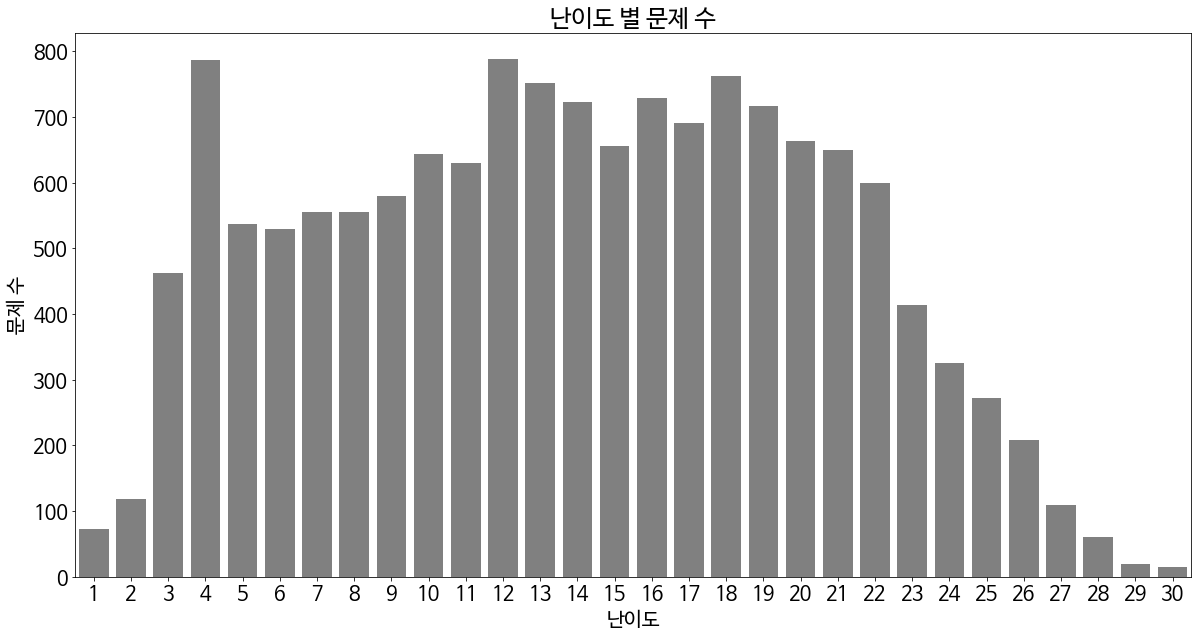

In [ ]:
level_freq = level_freq.drop(level_freq.index[0])
level_freq_plot = sns.barplot(x = level_freq.index, y = 'problemId', data = level_freq, color = 'grey')
level_freq_plot.set_title('난이도 별 문제 수')
level_freq_plot.set_xlabel('난이도')
level_freq_plot.set_ylabel('문제 수')
plt.show()

- 아주 쉬운 문제, 아주 어려운 문제: 문제 수가 적음
- 난이도 구간을 어떻게 나누는 것이 좋을까?



### 1-2) 난이도 별 맞은 사람 수의 평균



In [ ]:
problemMeta_acceptedUser = problemMeta[['acceptedUserCount', 'level']]
level_avg_acceptedUser = problemMeta_acceptedUser.groupby(['level']).mean()

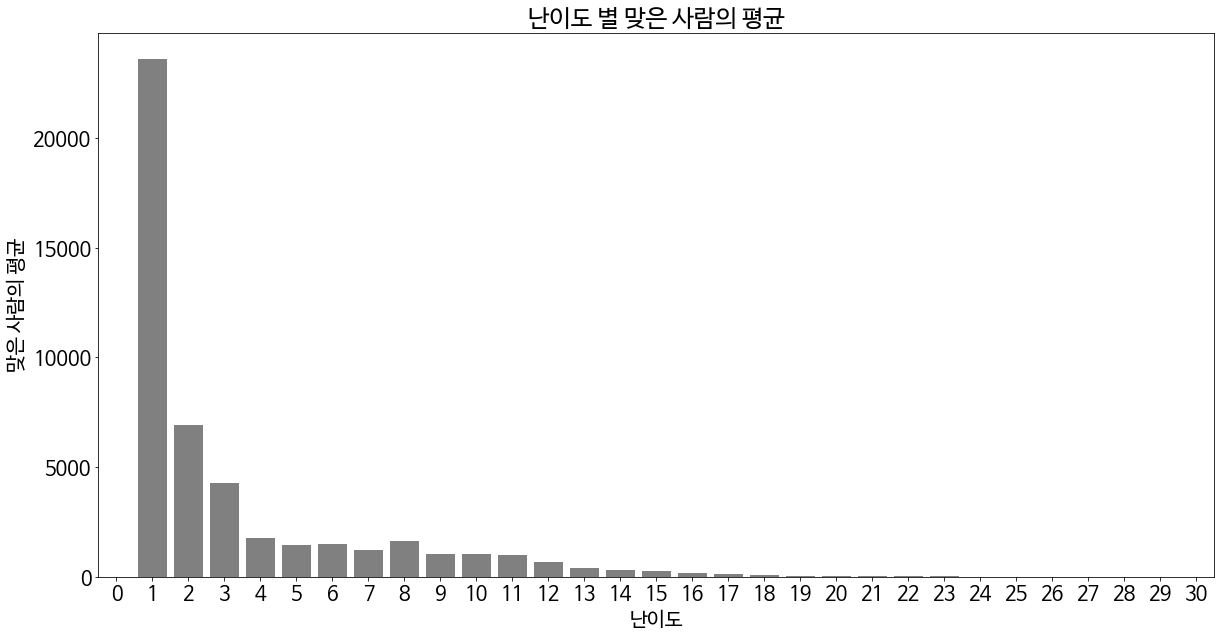

In [ ]:
level_avg_acceptedUser_plot = sns.barplot(x = level_avg_acceptedUser.index, y = 'acceptedUserCount', data = level_avg_acceptedUser, color = 'grey')
level_avg_acceptedUser_plot.set_title('난이도 별 맞은 사람 수의 평균')
level_avg_acceptedUser_plot.set_xlabel('난이도')
level_avg_acceptedUser_plot.set_ylabel('맞은 사람의 평균')
plt.show()

- level 1~3 제외 후 다시 출력

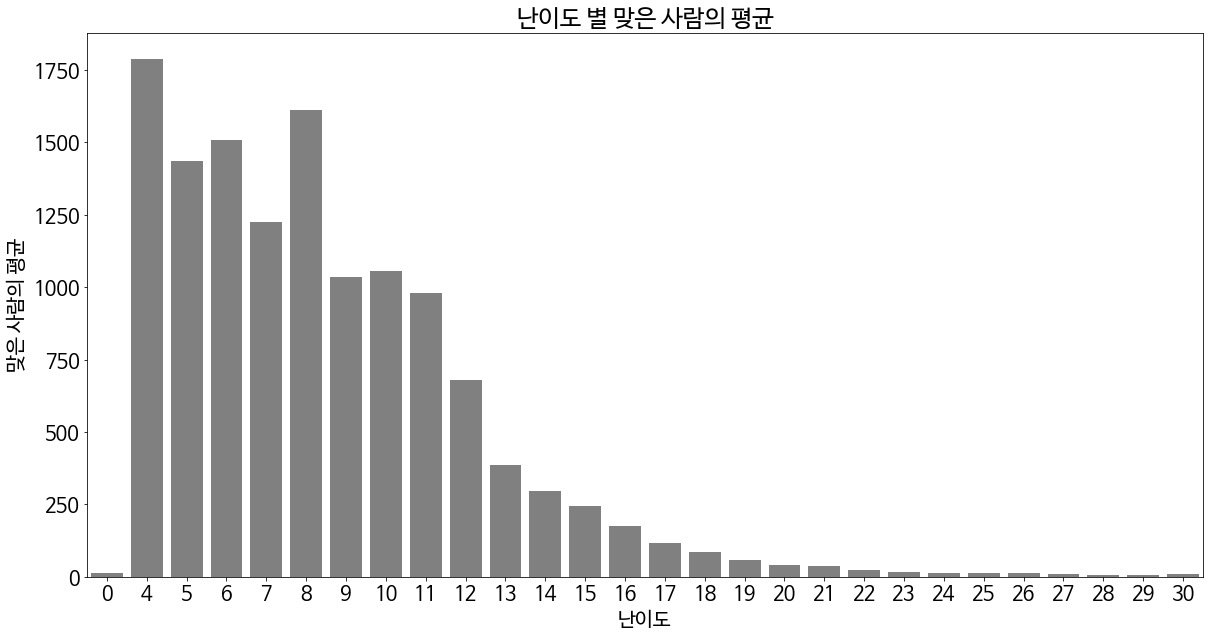

In [ ]:
level_avg_acceptedUser = level_avg_acceptedUser.drop(level_avg_acceptedUser.index[1:4])
level_avg_acceptedUser_plot = sns.barplot(x = level_avg_acceptedUser.index, y = 'acceptedUserCount', data = level_avg_acceptedUser, color = 'grey')
level_avg_acceptedUser_plot.set_title('난이도 별 맞은 사람 수의 평균')
level_avg_acceptedUser_plot.set_xlabel('난이도')
level_avg_acceptedUser_plot.set_ylabel('맞은 사람의 평균')
plt.show()

- 우하향 그래프
  - 문제가 어려울수록 맞은 사람의 수도 적음
  - 난이도가 적절하게 평가되어 있는 것 같음
- 구간
  - level 1-3
  - level 4-8
  - level 9-12
  - level 13-16
  - level 17-21
  - level 22-30

###1-3) 난이도 별 시도 수 평균

In [ ]:
problemMeta_avgTries = problemMeta[['averageTries', 'level']]
level_avg_avgTries = problemMeta_avgTries.groupby(['level']).mean()

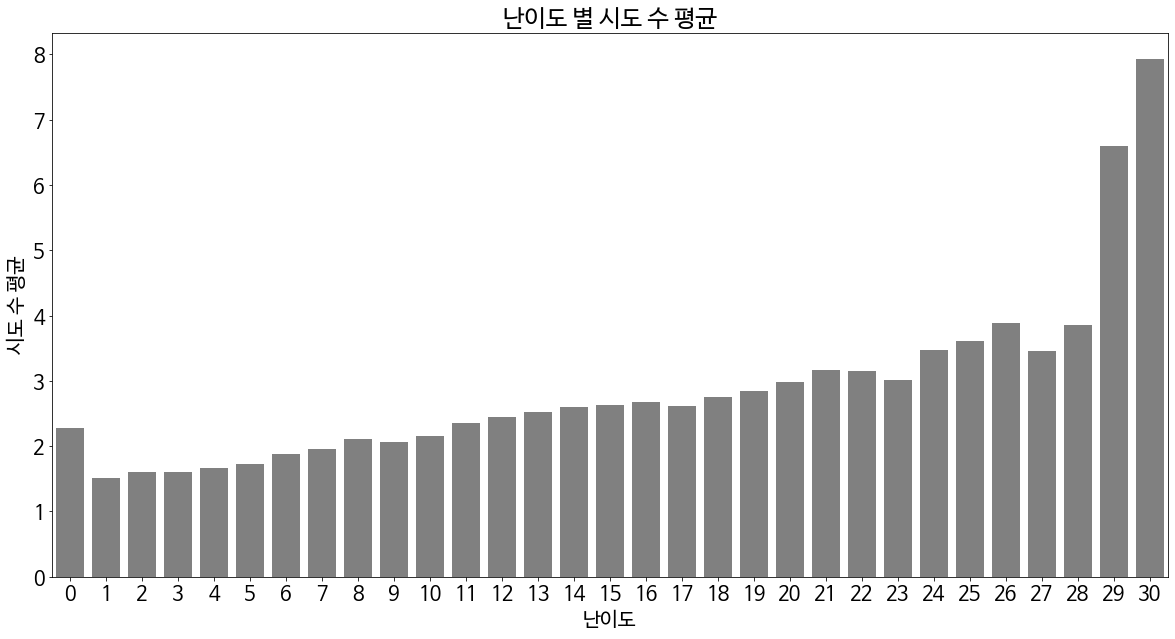

In [ ]:
level_avg_acceptedUser_plot = sns.barplot(x = level_avg_avgTries.index, y = 'averageTries', data = level_avg_avgTries, color = 'grey')
level_avg_acceptedUser_plot.set_title('난이도 별 시도 수 평균')
level_avg_acceptedUser_plot.set_xlabel('난이도')
level_avg_acceptedUser_plot.set_ylabel('시도 수 평균')
plt.show()

- 우상향 그래프
  - 문제가 어려울수록 시도 횟수의 평균이 높음

##2) 태그
- 빈도는 problemTagaMeta 항목 참고

### 2-1) 태그 별 빈도

In [ ]:
tag_freq = problemTagMeta[['key', 'problemCount', 'name_kor']]
tag_freq = tag_freq.sort_values(by='problemCount', ascending=False)
tag_freq

,key,problemCount,name_kor
107,math,3749,수학
87,implementation,3353,구현
50,dp,2354,다이나믹 프로그래밍
76,graphs,2198,그래프 이론
36,data_structures,2158,자료 구조
...,...,...,...
149,rb_tree,1,레드-블랙 트리
121,multipoint_evaluation,0,다중 대입값 계산
40,differential_cryptanalysis,0,차분 공격
43,discrete_kth_root,0,이산 k제곱근


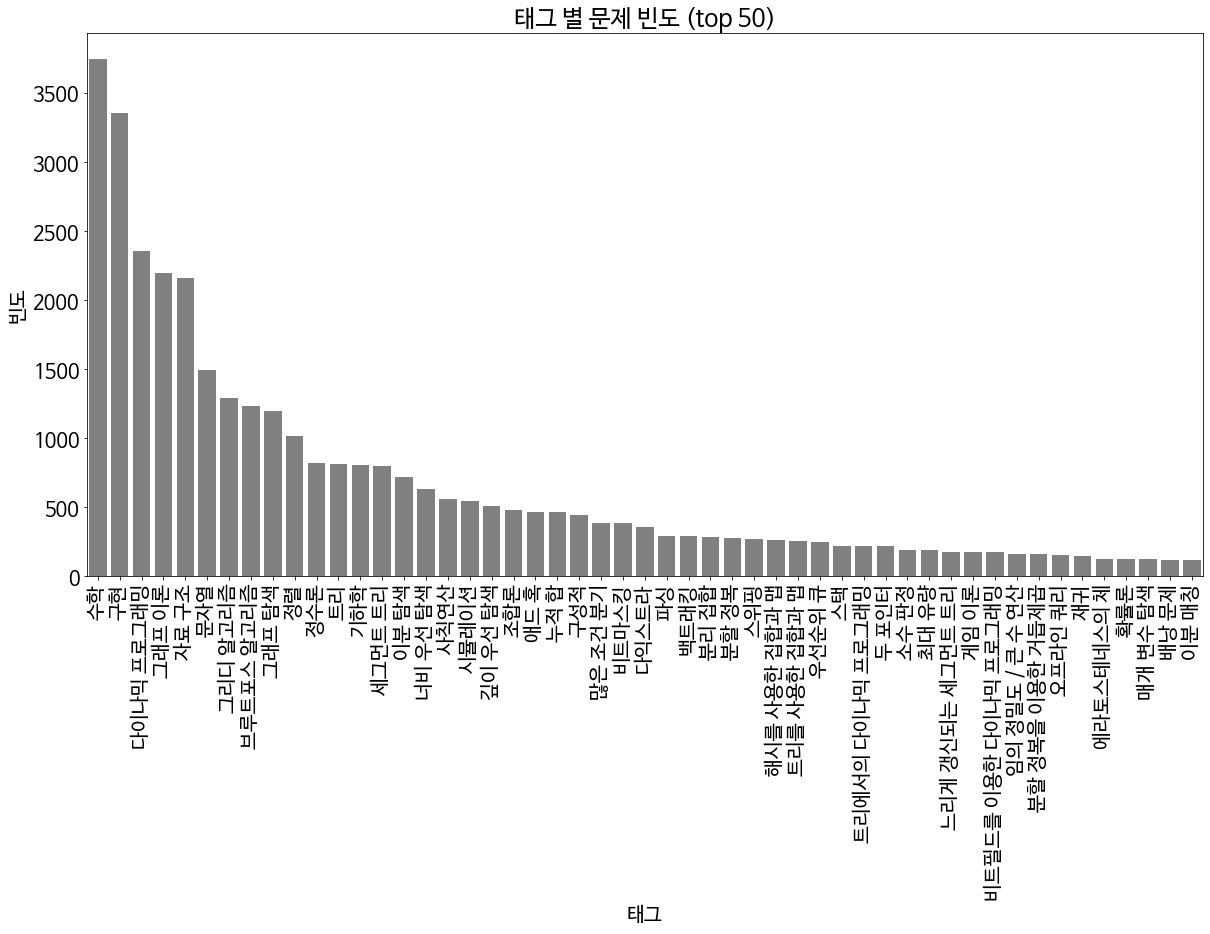

In [ ]:
tag_freq_plot = sns.barplot(x = 'name_kor', y = 'problemCount', data = tag_freq[:51], color = 'grey')
tag_freq_plot.set_title('태그 별 문제 빈도 (top 50)')
tag_freq_plot.set_xlabel('태그')
tag_freq_plot.set_ylabel('빈도')
plt.xticks(rotation = 90)
plt.show()

- 수학-구현-DP-그래프-자료구조 순으로 많음

In [ ]:
problemMeta_tag = problemMeta[['tags', 'level']]
tag_basket_freq = problemMeta_tag.groupby(['tags']).count()
tag_basket_freq = tag_basket_freq.sort_values(by='level', ascending=False)

for i, tags in enumerate(tag_basket_freq.iterrows()):
  tags = tags[0]
  tags_list = ast.literal_eval(tags)
  result = []
  for tag in tags_list:
    result.append(problemTagMeta[problemTagMeta['key']==tag]['name_kor'].tolist()[0])
  tag_basket_freq = tag_basket_freq.rename(index={tags: str(result)})

In [ ]:
tag_basket_freq

,level
tags,
[],8988
['다이나믹 프로그래밍'],650
['구현'],598
"['문자열', '구현']",405
['수학'],258
...,...
"['자료 구조', '세그먼트 트리', '이분 탐색', '정렬', '그리디 알고리즘']",1
"['이분 탐색', '가장 긴 증가하는 부분 수열: O(n log n)', '기하학']",1
"['자료 구조', '세그먼트 트리', '다익스트라', '그래프 이론', '우선순위 큐']",1


- 태그가 없는 문제: 8988개

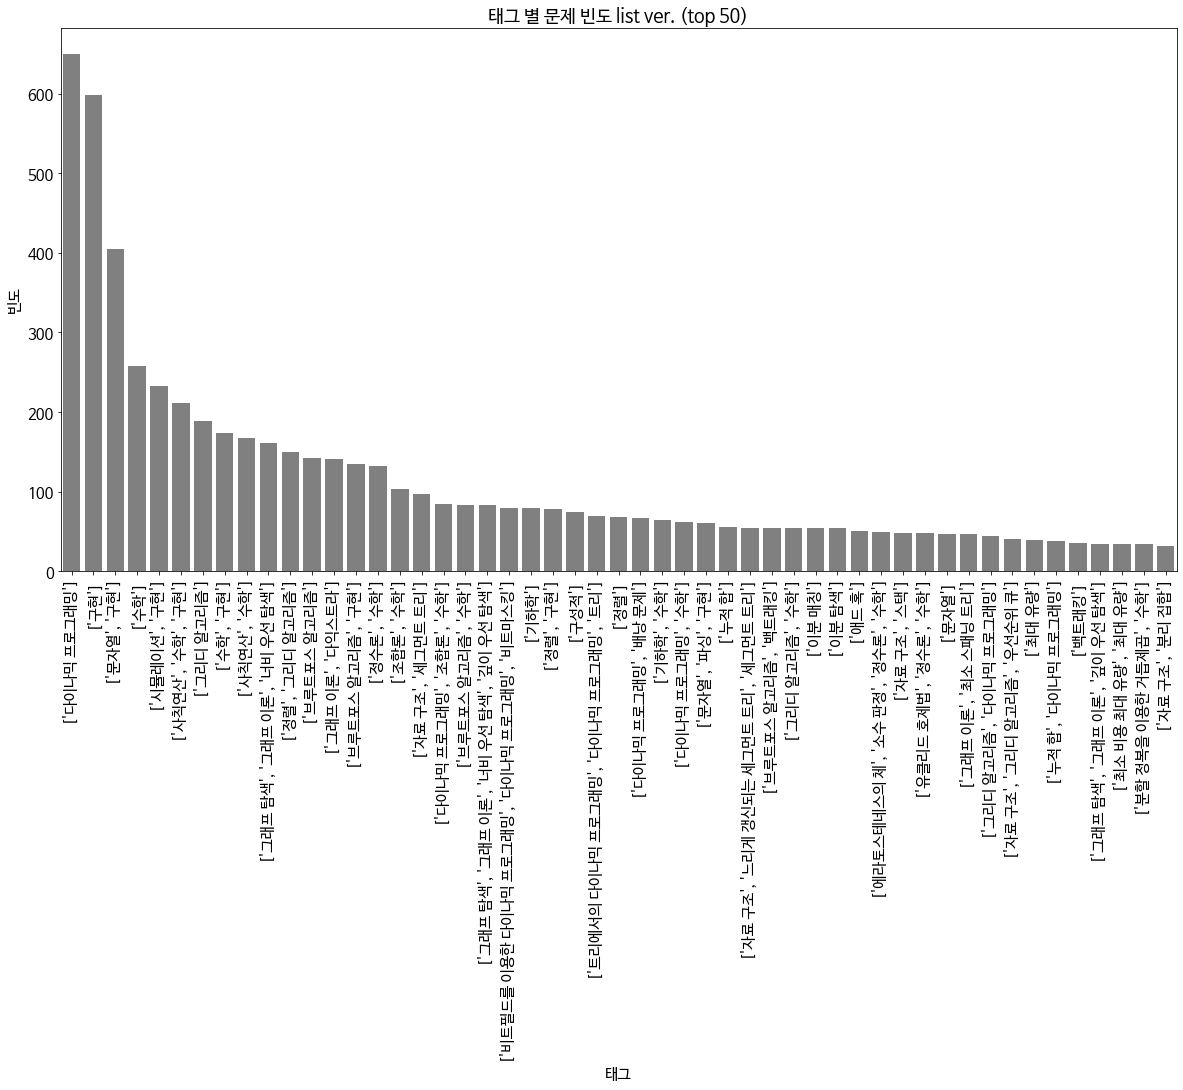

In [ ]:
tag_basket_freq_dropped = tag_basket_freq.drop(tag_basket_freq.index[0])
tag_basket_freq_plot = sns.barplot(x = tag_basket_freq_dropped.index[:51], y = 'level', data = tag_basket_freq_dropped[:51], color = 'grey')
tag_basket_freq_plot.set_title('태그 별 문제 빈도 list ver. (top 50)')
tag_basket_freq_plot.set_xlabel('태그')
tag_basket_freq_plot.set_ylabel('빈도')
plt.xticks(rotation = 90)
plt.rc('font', family=font_name, size=15)
plt.show()

- 태그 묶음으로는 DP-구현-문자열/구현-수학-시뮬레이션구현-사칙연산/구현 순으로 많음
- DP와 구현이 다른 태그보다 월등히 많은 양을 차지하고 있음

###2-2) 태그 별 평균 난이도

In [ ]:
tag_level_avg = problemMeta[['tags', 'level']]
for i, tags in enumerate(tag_level_avg['tags']):
  tags_list = ast.literal_eval(tags)
  result = []
  for tag in tags_list:
    result.append(problemTagMeta[problemTagMeta['key']==tag]['name_kor'].tolist()[0])
  tag_level_avg['tags'][i] = result

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
tag_level_avg_exploded = tag_level_avg.explode('tags')
tag_level_avg_exploded

,tags,level
0,사칙연산,1
0,수학,1
0,구현,1
1,사칙연산,1
1,수학,1
...,...,...
22766,NaN,0
22767,사칙연산,4
22767,시뮬레이션,4
22767,수학,4


In [ ]:
tag_level_avg_exploded = tag_level_avg_exploded.fillna('태그 없음')

In [ ]:
level_avg_tags = tag_level_avg_exploded.groupby('tags').mean()
level_avg_tags = level_avg_tags.sort_values(by='level')
level_avg_tags

,level
tags,
태그 없음,1.997107
사칙연산,3.734403
피타고라스 정리,5.476190
구현,8.324187
큐,9.342105
...,...
레드-블랙 트리,26.000000
일반적인 매칭,26.166667
매트로이드,26.500000


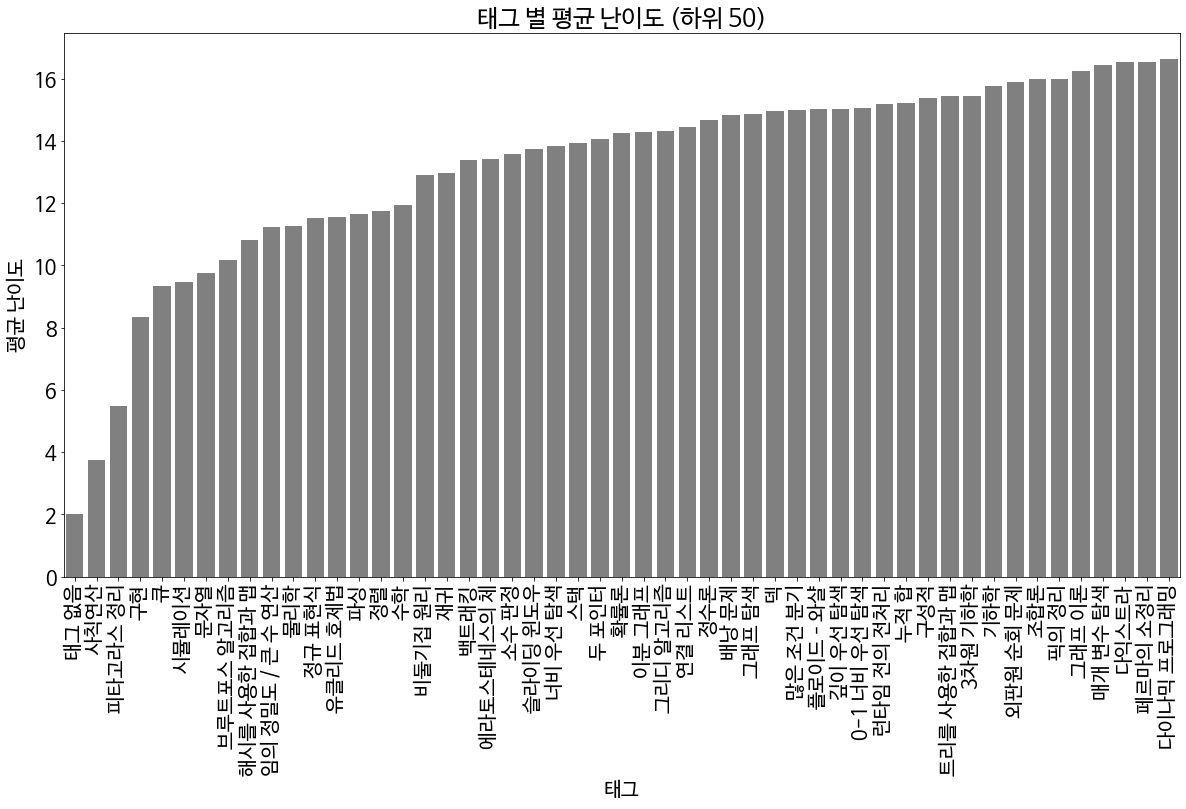

In [ ]:
level_avg_tags_plot = sns.barplot(x = level_avg_tags.index[:51], y = 'level', data = level_avg_tags[:51], color = 'grey')
level_avg_tags_plot.set_title('태그 별 평균 난이도 (하위 50)')
level_avg_tags_plot.set_xlabel('태그')
level_avg_tags_plot.set_ylabel('평균 난이도')
plt.xticks(rotation = 90)
plt.show()

- 사칙연산-피타고라스정리-구현-큐-시뮬레이션-문자열 순으로 쉬운 문제를 많이 가지고 있음

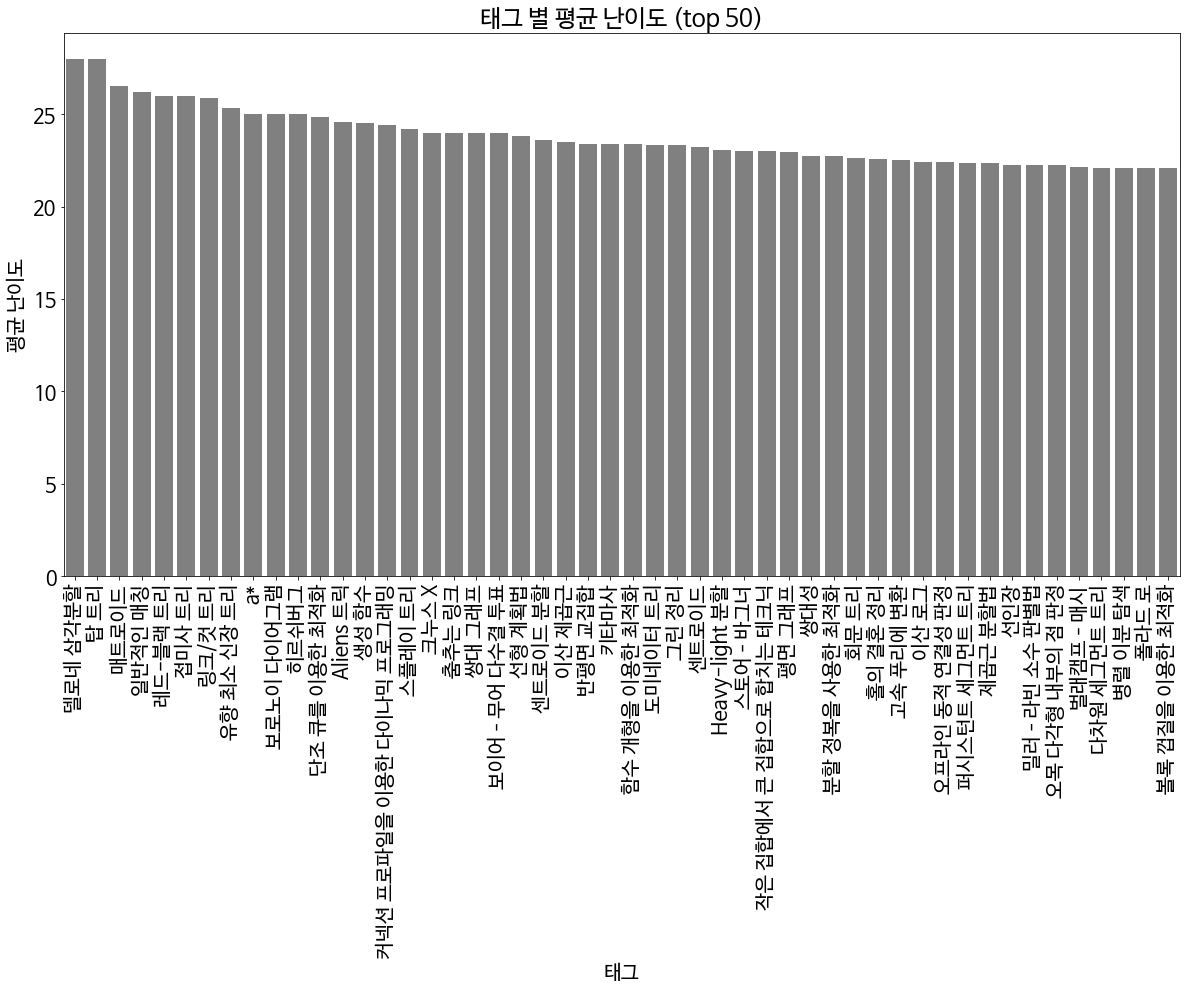

In [ ]:
level_avg_tags_top50 = level_avg_tags[-50:].sort_values(by='level', ascending=False)
level_avg_tags_plot = sns.barplot(x = level_avg_tags_top50.index, y = 'level', data = level_avg_tags_top50, color = 'grey')
level_avg_tags_plot.set_title('태그 별 평균 난이도 (top 50)')
level_avg_tags_plot.set_xlabel('태그')
level_avg_tags_plot.set_ylabel('평균 난이도')
plt.xticks(rotation = 90)
plt.show()

- 델로네삼각분할-탑트리-매트로이드-일반적인매칭-레드블랙트리 순으로 어려운 문제를 많이 가지고 있음

In [ ]:
tag_level_avg_list = tag_level_avg.copy(deep=True)
tag_level_avg_list['tags'] = tag_level_avg_list['tags'].astype('str')
level_avg_tags_list = tag_level_avg_list.groupby('tags').mean()
level_avg_tags_list = level_avg_tags_list.sort_values(by='level')

level_avg_tags_list_dropped = level_avg_tags_list.drop(level_avg_tags_list[level_avg_tags_list['level']==0].index)
level_avg_tags_list_dropped

,level
tags,
"['고속 푸리에 변환', '임의 정밀도 / 큰 수 연산', '수학']",0.0
"['누적 합', '이분 탐색', '두 포인터', '매개 변수 탐색']",0.0
"['자료 구조', '중간에서 만나기', '이분 탐색', '트리를 사용한 집합과 맵', '해시를 사용한 집합과 맵']",0.0
"['확률론', '다이나믹 프로그래밍', '수학', '구현']",0.0
"['기하학', '임의 정밀도 / 큰 수 연산', '수학']",0.0
...,...
"['많은 조건 분기', '임의 정밀도 / 큰 수 연산', '수학', '애드 혹', '구현']",30.0
"['링크/컷 트리', '탑 트리', '트리']",30.0
"['자료 구조', '정렬', '작은 집합에서 큰 집합으로 합치는 테크닉', '애드 혹', '그리디 알고리즘', '우선순위 큐']",30.0


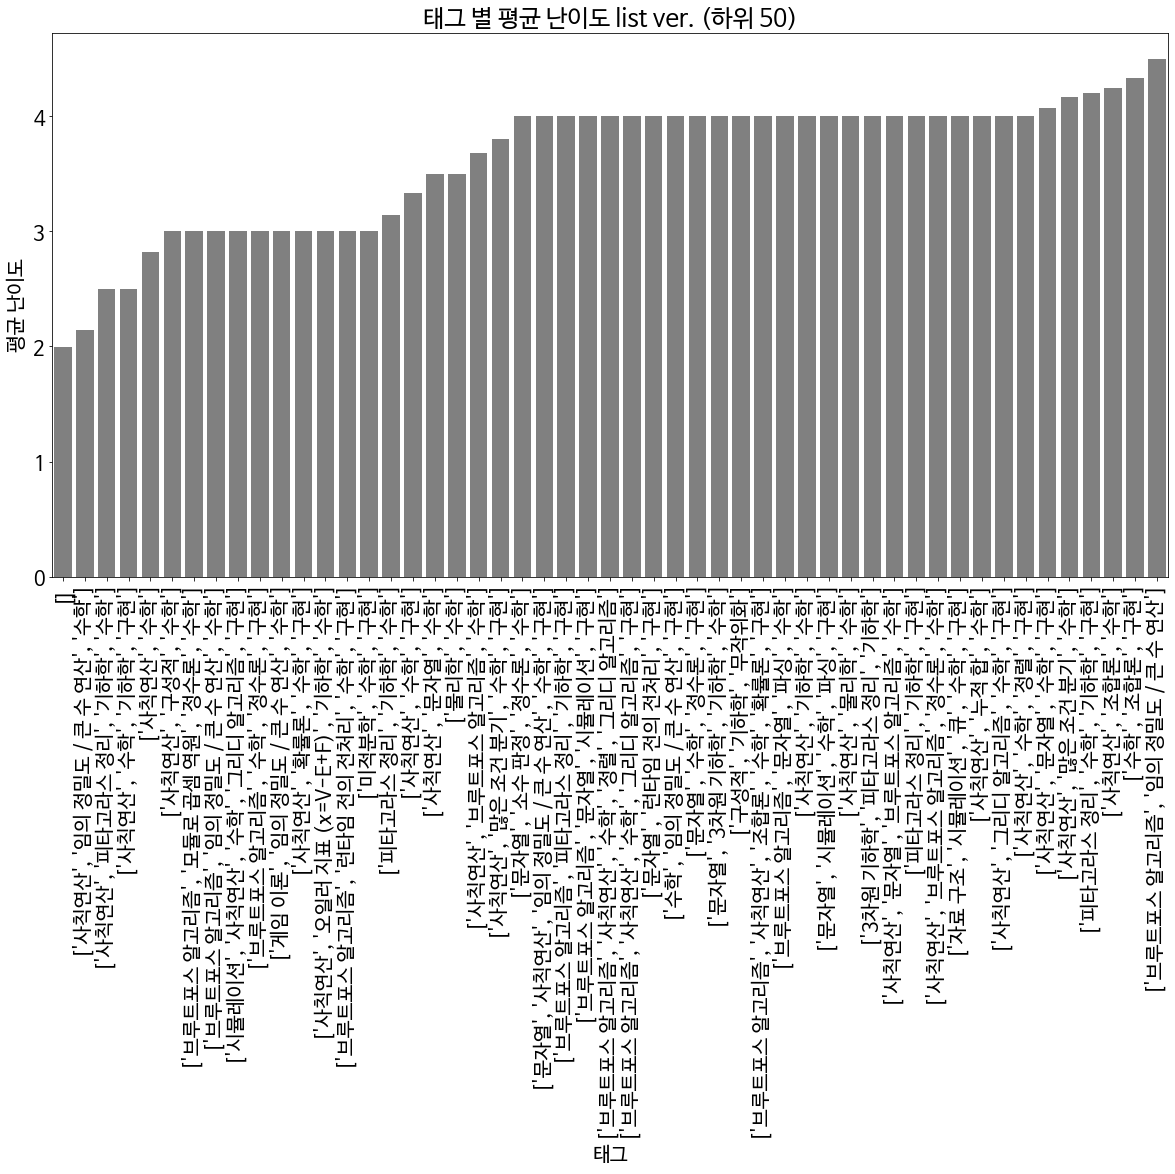

In [ ]:
level_avg_tags_list_plot = sns.barplot(x = level_avg_tags_list_dropped.index[:51], y = 'level', data = level_avg_tags_list_dropped[:51], color = 'grey')
level_avg_tags_list_plot.set_title('태그 별 평균 난이도 list ver. (하위 50)')
level_avg_tags_list_plot.set_xlabel('태그')
level_avg_tags_list_plot.set_ylabel('평균 난이도')
plt.xticks(rotation = 90)
plt.show()

- 태그 묶음이 가지는 평균 문제 난이도임
- 3763개의 종류를 가지고 있는데
- 그 중 사칙연산과 수학을 가지는 문제들이 쉬운 편에 속하는 것을 알 수 있음

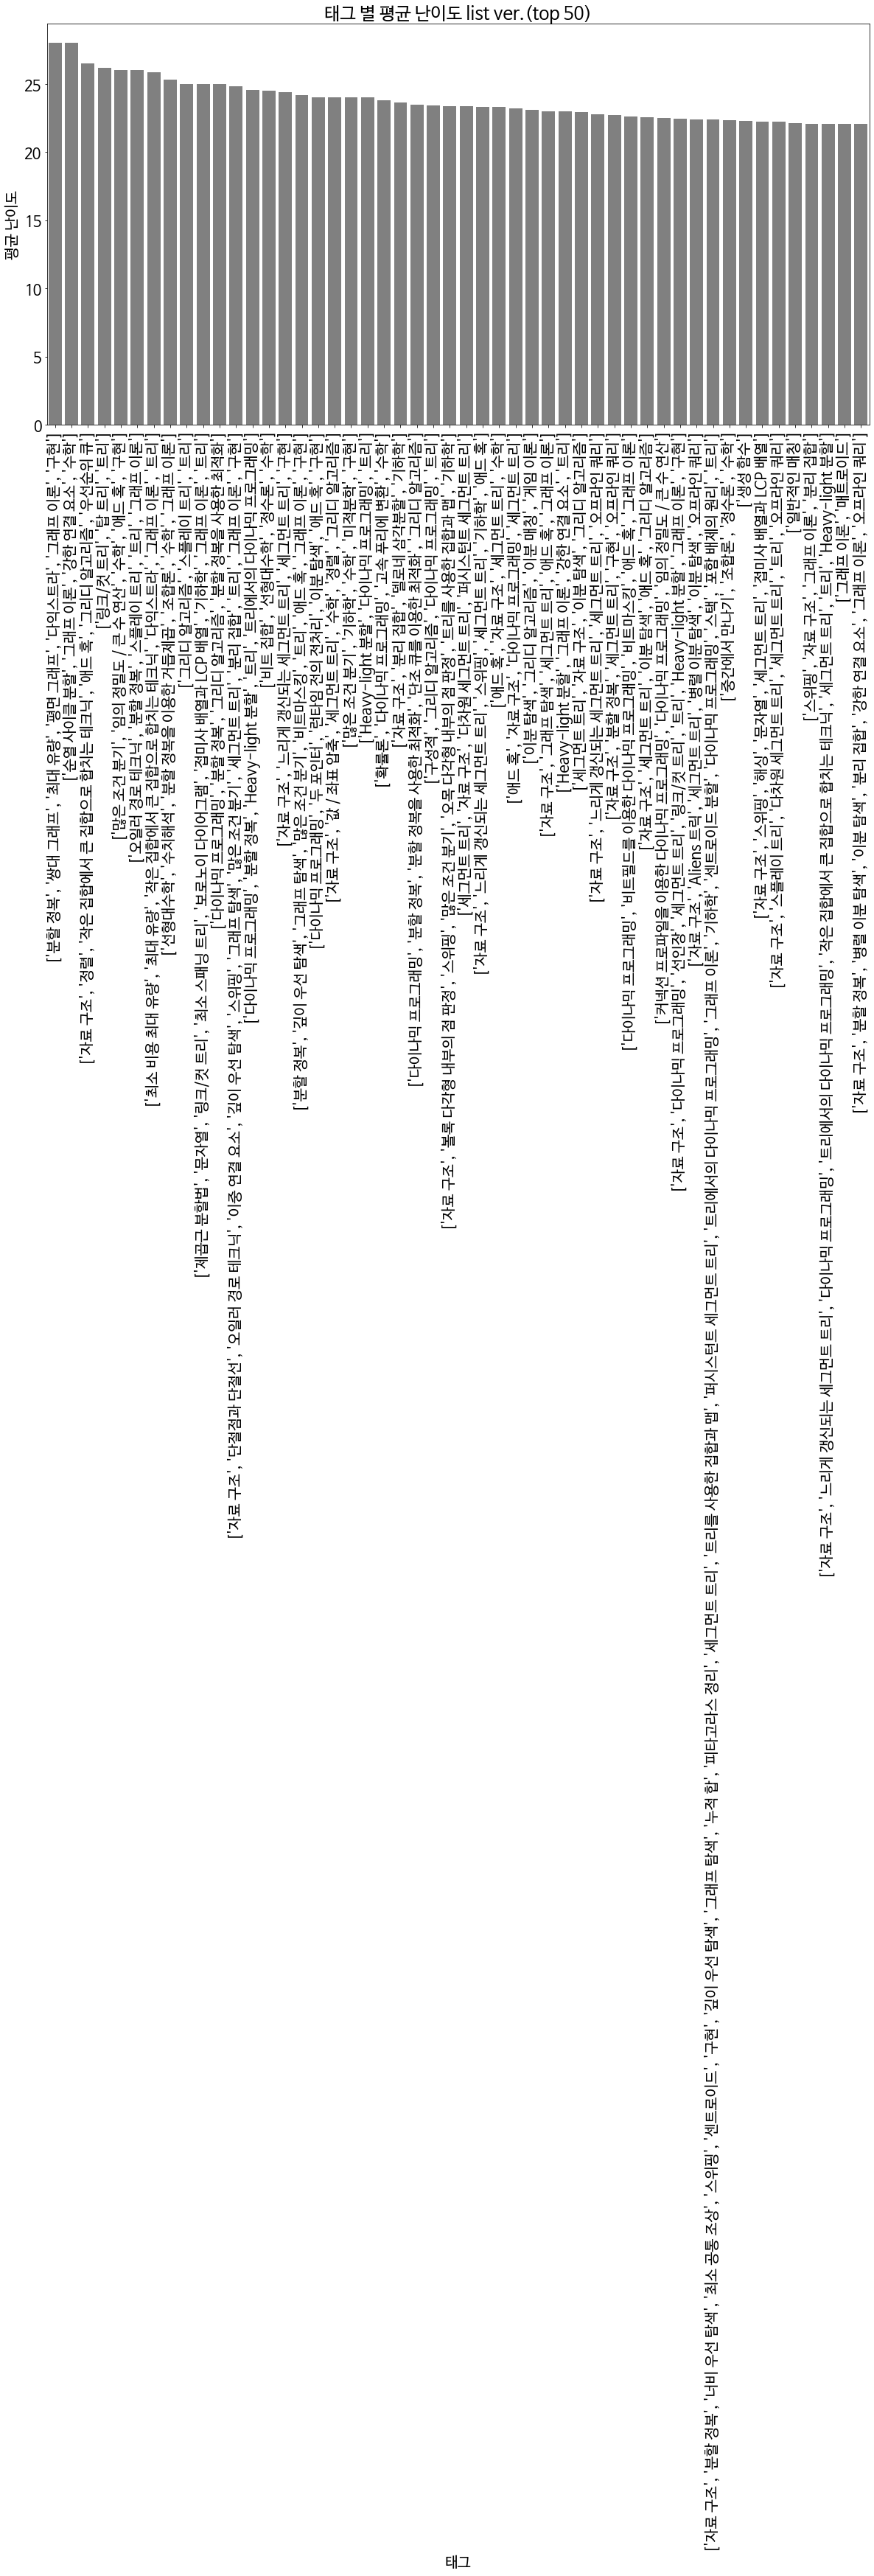

In [ ]:
level_avg_tags_list_top50 = level_avg_tags_list[-50:].sort_values(by='level', ascending=False)
level_avg_tags_list_top50_plot = sns.barplot(x = level_avg_tags_list_top50.index, y = 'level', data = level_avg_tags_top50, color = 'grey')
level_avg_tags_list_top50_plot.set_title('태그 별 평균 난이도 list ver.(top 50)')
level_avg_tags_list_top50_plot.set_xlabel('태그')
level_avg_tags_list_top50_plot.set_ylabel('평균 난이도')
plt.xticks(rotation = 90)
plt.show()

- 어려운 문제를 가진 태그 묶음들임

##3) 맞은 문제

###3-1) 통계

In [ ]:
problemMeta_count = problemMeta[['title', 'acceptedUserCount']]
problemMeta_count_count = problemMeta_count.groupby('acceptedUserCount').count()
problemMeta_count_count = problemMeta_count_count.reset_index(drop=False)

In [ ]:
idx = [0,1,3,5,10,30,50,100,500,1000,3000,5000,10000, 30000, 50000, 100000, 150000]
accumulated_count = []
percent = []
for i in idx:
  ac = problemMeta_count_count[problemMeta_count_count['acceptedUserCount'] <= i]['title'].sum() # 맞춘 사람 수 별, 문제 수
  accumulated_count.append(ac)
  percent.append(ac/22768*100)

In [ ]:
accumulated_acceptedUser = pd.DataFrame({'accumulated_count':accumulated_count, 'percent':percent}, index=idx)
accumulated_acceptedUser

,accumulated_count,percent
0,3464,15.214336
1,5333,23.423226
3,7740,33.995081
5,9236,40.565706
10,11458,50.325018
30,15239,66.931658
50,16776,73.682361
100,18377,80.714160
500,20825,91.466093
1000,21447,94.197997


- 맞은 사람의 수가 10명 이하인 문제가 전체 문제의 50%를 차지함
- 협업 필터링 모델만 사용하면 추천되지 않을 확률이 높기 때문에 다른 방법이 필요함

###3-2) 많이 맞은 문제

In [ ]:
problemMeta_count_sorted = problemMeta_count.sort_values(by='acceptedUserCount', ascending=False)

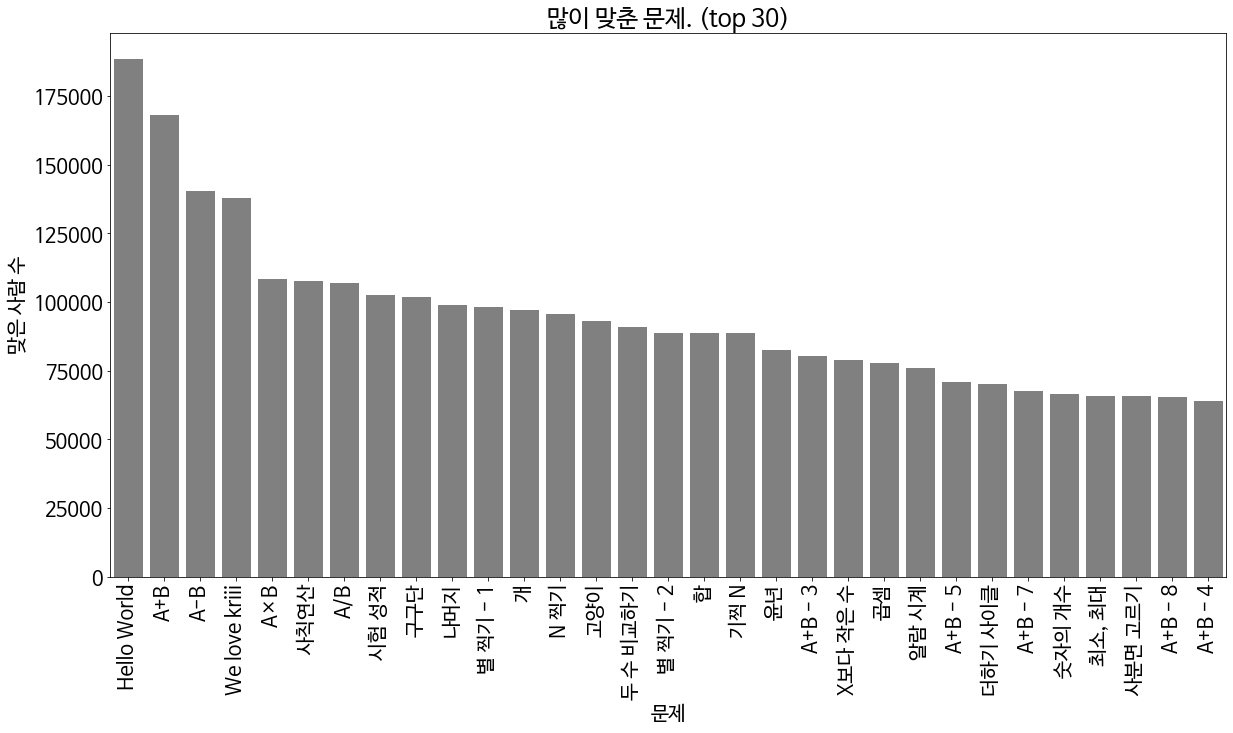

In [ ]:
problemMeta_count_plot = sns.barplot(x = 'title', y = 'acceptedUserCount', data = problemMeta_count_sorted[:31], color = 'grey')
problemMeta_count_plot.set_title('많이 맞은 문제. (top 30)')
problemMeta_count_plot.set_xlabel('문제')
problemMeta_count_plot.set_ylabel('맞은 사람 수')
plt.xticks(rotation = 90)
plt.show()

# solvedProblem.csv

- ```handle```: 백준 id 
- ```count```: 해결한 문제 수
- ```problemIds```: 해결한 문제 id

In [96]:
solvedProblem = pd.read_csv(os.path.join(DATA_DIR, "solvedProblem.csv"))
solvedProblem = solvedProblem[['handle', 'count', 'problemIds']]
solvedProblem

,handle,count,problemIds
0,0000000000,633.0,"[4101, 10250, 16394, 20492, 20499, 16428, 1643..."
1,0000064,130.0,"[2562, 1541, 4101, 1543, 1546, 2577, 2588, 106..."
2,0000sb,9.0,"[15965, 1000, 1001, 1388, 15962, 15963, 15964,..."
3,0004poppop,126.0,"[2562, 1547, 11279, 2577, 1043, 2583, 2589, 10..."
4,001,227.0,"[2562, 1018, 11779, 10757, 18436, 1546, 10250,..."
...,...,...,...
59888,zzzzlll,6.0,"[1697, 2178, 7569, 2578, 7576, 1753]"
59889,zzzzong123,3.0,"[1931, 10868, 1158]"
59890,zzzzz9887,27.0,"[2438, 2439, 11021, 11022, 9498, 2588, 1330, 2..."
59891,zzzzzzzz,53.0,"[17413, 1158, 2438, 2439, 1929, 1546, 1292, 10..."


In [ ]:
solvedProblem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59893 entries, 0 to 59892
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   handle      59893 non-null  object 
 1   count       59893 non-null  float64
 2   problemIds  59893 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.4+ MB


총 **59893** 개의 사용자 데이터

###1) 데이터 요약

In [ ]:
solvedProblem_sorted = solvedProblem.sort_values(by='count', ascending=False)
solvedProblem_sorted['count'].describe()

count    59893.000000
mean       121.755347
std        224.668524
min          0.000000
25%         25.000000
50%         63.000000
75%        139.000000
max      10882.000000
Name: count, dtype: float64

In [ ]:
solvedProblem_count = solvedProblem_sorted[['handle', 'count']].groupby('count').count()
solvedProblem_count = solvedProblem_count.reset_index(drop=False)
idx = [0,1,5,10,15,20,30,40,50,75,100,125,150,200,300,500,1000]
accumulated_count = []
percent = []
for i in idx:
  ac = solvedProblem_count[solvedProblem_count['count'] <= i]['handle'].sum()
  accumulated_count.append(ac)
  percent.append(ac/59893*100)

In [ ]:
accumulated_solvedProblem = pd.DataFrame({'accumulated_count':accumulated_count, 'percent':percent}, index = idx)
accumulated_solvedProblem

,accumulated_count,percent
0,1192,1.990216
1,2148,3.586396
5,5322,8.885846
10,8123,13.562520
15,10722,17.901925
20,13037,21.767151
30,17121,28.585978
40,21433,35.785484
50,25338,42.305445
75,33465,55.874643


- 초기사용자: 15명 이하

###2) 난이도

**for clustering**
- 문제 난이도 별로 count

In [116]:
solvedProblem_level = solvedProblem[['handle','count','problemIds']]
solvedProblem_level

,handle,count,problemIds
0,0000000000,633.0,"[4101, 10250, 16394, 20492, 20499, 16428, 1643..."
1,0000064,130.0,"[2562, 1541, 4101, 1543, 1546, 2577, 2588, 106..."
2,0000sb,9.0,"[15965, 1000, 1001, 1388, 15962, 15963, 15964,..."
3,0004poppop,126.0,"[2562, 1547, 11279, 2577, 1043, 2583, 2589, 10..."
4,001,227.0,"[2562, 1018, 11779, 10757, 18436, 1546, 10250,..."
...,...,...,...
59888,zzzzlll,6.0,"[1697, 2178, 7569, 2578, 7576, 1753]"
59889,zzzzong123,3.0,"[1931, 10868, 1158]"
59890,zzzzz9887,27.0,"[2438, 2439, 11021, 11022, 9498, 2588, 1330, 2..."
59891,zzzzzzzz,53.0,"[17413, 1158, 2438, 2439, 1929, 1546, 1292, 10..."


In [117]:
solvedProblem_level['problemIds'] = solvedProblem_level['problemIds'].apply(lambda x: ast.literal_eval(x))

In [118]:
problemMeta_level = problemMeta.set_index('problemId')['level'].to_dict()
solvedProblem_level['Counter'] = solvedProblem_level['problemIds'].apply(lambda x: [problemMeta_level[problem] for problem in x if problem in problemMeta_level])

In [119]:
solvedProblem_level['IdwithLevel'] = solvedProblem_level['problemIds'].apply(lambda x: [{problem:problemMeta_level[problem]} for problem in x if problem in problemMeta_level])
solvedProblem_level

,handle,count,problemIds,Counter,IdwithLevel
0,0000000000,633.0,"[4101, 10250, 16394, 20492, 20499, 16428, 1643...","[3, 3, 1, 1, 2, 2, 1, 2, 12, 4, 6, 3, 15, 7, 1...","[{4101: 3}, {10250: 3}, {16394: 1}, {20492: 1}..."
1,0000064,130.0,"[2562, 1541, 4101, 1543, 1546, 2577, 2588, 106...","[4, 9, 3, 7, 5, 4, 2, 7, 2, 11, 4, 7, 7, 6, 3,...","[{2562: 4}, {1541: 9}, {4101: 3}, {1543: 7}, {..."
2,0000sb,9.0,"[15965, 1000, 1001, 1388, 15962, 15963, 15964,...","[9, 1, 1, 7, 1, 2, 1, 1, 11]","[{15965: 9}, {1000: 1}, {1001: 1}, {1388: 7}, ..."
3,0004poppop,126.0,"[2562, 1547, 11279, 2577, 1043, 2583, 2589, 10...","[4, 3, 9, 4, 12, 10, 11, 8, 10, 4, 11, 12, 11,...","[{2562: 4}, {1547: 3}, {11279: 9}, {2577: 4}, ..."
4,001,227.0,"[2562, 1018, 11779, 10757, 18436, 1546, 10250,...","[4, 6, 13, 1, 15, 5, 3, 1, 1, 1, 1, 4, 2, 1, 1...","[{2562: 4}, {1018: 6}, {11779: 13}, {10757: 1}..."
...,...,...,...,...,...
59888,zzzzlll,6.0,"[1697, 2178, 7569, 2578, 7576, 1753]","[10, 10, 11, 6, 11, 11]","[{1697: 10}, {2178: 10}, {7569: 11}, {2578: 6}..."
59889,zzzzong123,3.0,"[1931, 10868, 1158]","[9, 15, 6]","[{1931: 9}, {10868: 15}, {1158: 6}]"
59890,zzzzz9887,27.0,"[2438, 2439, 11021, 11022, 9498, 2588, 1330, 2...","[3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 1, 1, 1, 4, 2, ...","[{2438: 3}, {2439: 3}, {11021: 3}, {11022: 3},..."
59891,zzzzzzzz,53.0,"[17413, 1158, 2438, 2439, 1929, 1546, 1292, 10...","[8, 6, 3, 3, 8, 5, 6, 6, 7, 3, 6, 11, 2, 8, 10...","[{17413: 8}, {1158: 6}, {2438: 3}, {2439: 3}, ..."


In [120]:
solvedProblem_level['Counter_object'] = solvedProblem_level['Counter'].apply(lambda x: collections.Counter(x))
solvedProblem_level

,handle,count,problemIds,Counter,IdwithLevel,Counter_object
0,0000000000,633.0,"[4101, 10250, 16394, 20492, 20499, 16428, 1643...","[3, 3, 1, 1, 2, 2, 1, 2, 12, 4, 6, 3, 15, 7, 1...","[{4101: 3}, {10250: 3}, {16394: 1}, {20492: 1}...","{3: 103, 1: 72, 2: 78, 12: 15, 4: 58, 6: 40, 1..."
1,0000064,130.0,"[2562, 1541, 4101, 1543, 1546, 2577, 2588, 106...","[4, 9, 3, 7, 5, 4, 2, 7, 2, 11, 4, 7, 7, 6, 3,...","[{2562: 4}, {1541: 9}, {4101: 3}, {1543: 7}, {...","{4: 21, 9: 5, 3: 24, 7: 10, 5: 8, 2: 15, 11: 3..."
2,0000sb,9.0,"[15965, 1000, 1001, 1388, 15962, 15963, 15964,...","[9, 1, 1, 7, 1, 2, 1, 1, 11]","[{15965: 9}, {1000: 1}, {1001: 1}, {1388: 7}, ...","{9: 1, 1: 5, 7: 1, 2: 1, 11: 1}"
3,0004poppop,126.0,"[2562, 1547, 11279, 2577, 1043, 2583, 2589, 10...","[4, 3, 9, 4, 12, 10, 11, 8, 10, 4, 11, 12, 11,...","[{2562: 4}, {1547: 3}, {11279: 9}, {2577: 4}, ...","{4: 6, 3: 15, 9: 8, 12: 11, 10: 14, 11: 15, 8:..."
4,001,227.0,"[2562, 1018, 11779, 10757, 18436, 1546, 10250,...","[4, 6, 13, 1, 15, 5, 3, 1, 1, 1, 1, 4, 2, 1, 1...","[{2562: 4}, {1018: 6}, {11779: 13}, {10757: 1}...","{4: 19, 6: 18, 13: 3, 1: 71, 15: 12, 5: 9, 3: ..."
...,...,...,...,...,...,...
59888,zzzzlll,6.0,"[1697, 2178, 7569, 2578, 7576, 1753]","[10, 10, 11, 6, 11, 11]","[{1697: 10}, {2178: 10}, {7569: 11}, {2578: 6}...","{10: 2, 11: 3, 6: 1}"
59889,zzzzong123,3.0,"[1931, 10868, 1158]","[9, 15, 6]","[{1931: 9}, {10868: 15}, {1158: 6}]","{9: 1, 15: 1, 6: 1}"
59890,zzzzz9887,27.0,"[2438, 2439, 11021, 11022, 9498, 2588, 1330, 2...","[3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 1, 1, 1, 4, 2, ...","[{2438: 3}, {2439: 3}, {11021: 3}, {11022: 3},...","{3: 10, 2: 6, 1: 10, 4: 1}"
59891,zzzzzzzz,53.0,"[17413, 1158, 2438, 2439, 1929, 1546, 1292, 10...","[8, 6, 3, 3, 8, 5, 6, 6, 7, 3, 6, 11, 2, 8, 10...","[{17413: 8}, {1158: 6}, {2438: 3}, {2439: 3}, ...","{8: 9, 6: 5, 3: 8, 5: 3, 7: 5, 11: 2, 2: 4, 10..."


In [121]:
solvedProblem_level.to_csv(os.path.join(DATA_DIR, 'solvedProblem_level.csv'), mode='w')